In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

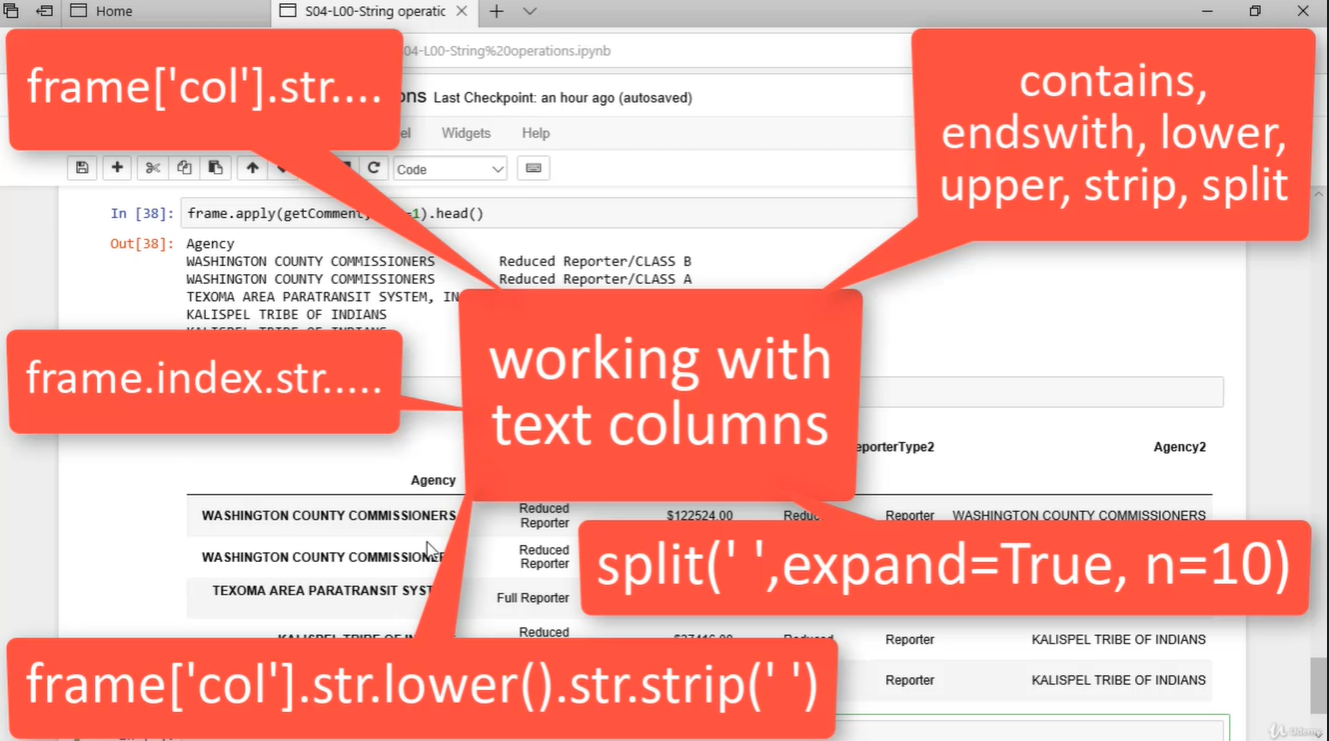

In [ ]:
frame = pd.read_csv('/content/PublicTransitExpenses.csv', usecols=['Agency', 'Reporter Type', 'Total Operating Expenses'])
frame.head()

,Agency,Reporter Type,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,$122524.00
1,Washington County Commissioners,Reduced Reporter,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [ ]:
frame['Agency'].str.contains('Washington')

0         True
1         True
2        False
3        False
4        False
         ...  
17839    False
17840    False
17841    False
17842    False
17843    False
Name: Agency, Length: 17844, dtype: bool

In [ ]:
frame[frame['Agency'].str.contains('Washington')]

,Agency,Reporter Type,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,$122524.00
1,Washington County Commissioners,Reduced Reporter,$272715.00
199,Washington State Ferries,Full Reporter,$16215777.00
213,Washington State Ferries,Full Reporter,$11132493.00
364,Washington State Ferries,Full Reporter,$11750411.00
...,...,...,...
15871,Washington Hancock Community Agency,Rural Reporter,$995395.00
16213,City of Washington,Rural Reporter,$105117.00
16313,City of Washington,Rural Reporter,$102799.00
16316,Washington Parish Council on Aging,Rural Reporter,$546300.00


In [ ]:
frame['Agency'].str.lower()

0            washington county commissioners
1            washington county commissioners
2        texoma area paratransit system, inc
3                  kalispel tribe of indians
4                  kalispel tribe of indians
                        ...                 
17839      cedar area transportation service
17840                          tehama county
17841                         city of dixon 
17842        morongo basin transit authority
17843                          city of arvin
Name: Agency, Length: 17844, dtype: object

In [ ]:
frame['Agency'] = frame['Agency'].str.lower()
frame.head()

,Agency,Reporter Type,Total Operating Expenses
0,washington county commissioners,Reduced Reporter,$122524.00
1,washington county commissioners,Reduced Reporter,$272715.00
2,"texoma area paratransit system, inc",Full Reporter,$7295.00
3,kalispel tribe of indians,Reduced Reporter,$37416.00
4,kalispel tribe of indians,Reduced Reporter,$345789.00


In [ ]:
frame[frame['Agency'].str.contains('washington')].head()

,Agency,Reporter Type,Total Operating Expenses
0,washington county commissioners,Reduced Reporter,$122524.00
1,washington county commissioners,Reduced Reporter,$272715.00
199,washington state ferries,Full Reporter,$16215777.00
213,washington state ferries,Full Reporter,$11132493.00
364,washington state ferries,Full Reporter,$11750411.00


In [ ]:
frame = pd.read_csv('/content/PublicTransitExpenses.csv', usecols=['Agency', 'Reporter Type', 'Total Operating Expenses'])
frame.head()

,Agency,Reporter Type,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,$122524.00
1,Washington County Commissioners,Reduced Reporter,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [ ]:
frame[frame['Agency'].str.lower().str.endswith('ferries')]

,Agency,Reporter Type,Total Operating Expenses
199,Washington State Ferries,Full Reporter,$16215777.00
213,Washington State Ferries,Full Reporter,$11132493.00
364,Washington State Ferries,Full Reporter,$11750411.00
397,Washington State Ferries,Full Reporter,$22400732.00
604,Washington State Ferries,Full Reporter,$17715787.00
634,Washington State Ferries,Full Reporter,$236320045.00
653,Washington State Ferries,Full Reporter,$184425025.00
684,Washington State Ferries,Full Reporter,$186344635.00
915,Washington State Ferries,Full Reporter,$236711555.00
1114,Washington State Ferries,Full Reporter,$23046740.00


In [ ]:
endsWithFerries = frame['Agency'].str.lower().str.strip().str.endswith('ferries')
frame[endsWithFerries]

,Agency,Reporter Type,Total Operating Expenses
199,Washington State Ferries,Full Reporter,$16215777.00
213,Washington State Ferries,Full Reporter,$11132493.00
364,Washington State Ferries,Full Reporter,$11750411.00
397,Washington State Ferries,Full Reporter,$22400732.00
604,Washington State Ferries,Full Reporter,$17715787.00
634,Washington State Ferries,Full Reporter,$236320045.00
653,Washington State Ferries,Full Reporter,$184425025.00
684,Washington State Ferries,Full Reporter,$186344635.00
915,Washington State Ferries,Full Reporter,$236711555.00
1114,Washington State Ferries,Full Reporter,$23046740.00


In [ ]:
frame.set_index('Agency', inplace=True)
frame.head()

,Reporter Type,Total Operating Expenses
Agency,,
Washington County Commissioners,Reduced Reporter,$122524.00
Washington County Commissioners,Reduced Reporter,$272715.00
"Texoma Area Paratransit System, Inc",Full Reporter,$7295.00
Kalispel Tribe of Indians,Reduced Reporter,$37416.00
Kalispel Tribe of Indians,Reduced Reporter,$345789.00


In [ ]:
frame.index = frame.index.str.strip().str.upper()
frame.head()

,Reporter Type,Total Operating Expenses
Agency,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00


In [ ]:
frame['Reporter Type'].value_counts().head()

Full Reporter       13345
Rural Reporter       3116
Reduced Reporter     1313
Separate Service       70
Name: Reporter Type, dtype: int64

In [ ]:
frame['Reporter Type'].str.split(' ').head()

Agency
WASHINGTON COUNTY COMMISSIONERS        [Reduced, Reporter]
WASHINGTON COUNTY COMMISSIONERS        [Reduced, Reporter]
TEXOMA AREA PARATRANSIT SYSTEM, INC       [Full, Reporter]
KALISPEL TRIBE OF INDIANS              [Reduced, Reporter]
KALISPEL TRIBE OF INDIANS              [Reduced, Reporter]
Name: Reporter Type, dtype: object

In [ ]:
frame['Reporter Type'].str.split(' ').str[0].head()

Agency
WASHINGTON COUNTY COMMISSIONERS        Reduced
WASHINGTON COUNTY COMMISSIONERS        Reduced
TEXOMA AREA PARATRANSIT SYSTEM, INC       Full
KALISPEL TRIBE OF INDIANS              Reduced
KALISPEL TRIBE OF INDIANS              Reduced
Name: Reporter Type, dtype: object

In [ ]:
frame['Reporter Type'].str.split(' ',expand=True).head()

,0,1
Agency,,
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
WASHINGTON COUNTY COMMISSIONERS,Reduced,Reporter
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter
KALISPEL TRIBE OF INDIANS,Reduced,Reporter


In [ ]:
frame[['ReaporterType1', 'ReporterType2']] = frame['Reporter Type'].str.split(' ',expand=True)
frame.head()

,Reporter Type,Total Operating Expenses,ReaporterType1,ReporterType2
Agency,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter


In [ ]:
frame['Agency2'] = frame.index
frame.head()

,Reporter Type,Total Operating Expenses,ReaporterType1,ReporterType2,Agency2
Agency,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC"
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS


Parametrem n=10 określam, że ma być wydobywanych maksymalnie 10 spacji

In [ ]:
frame['Agency2'].str.split(' ', expand=True,n=10).head()

,0,1,2,3,4,5,6,7,8,9,10
Agency,,,,,,,,,,,
WASHINGTON COUNTY COMMISSIONERS,WASHINGTON,COUNTY,COMMISSIONERS,None,None,None,None,None,None,None,None
WASHINGTON COUNTY COMMISSIONERS,WASHINGTON,COUNTY,COMMISSIONERS,None,None,None,None,None,None,None,None
"TEXOMA AREA PARATRANSIT SYSTEM, INC",TEXOMA,AREA,PARATRANSIT,"SYSTEM,",INC,None,None,None,None,None,None
KALISPEL TRIBE OF INDIANS,KALISPEL,TRIBE,OF,INDIANS,None,None,None,None,None,None,None
KALISPEL TRIBE OF INDIANS,KALISPEL,TRIBE,OF,INDIANS,None,None,None,None,None,None,None


Metoda Apply pozwala uruchomić zdefiniowaną funkcję dla każdego wiersza oddzielnie

In [ ]:
def getComment(row):
  reporterType = row['Reporter Type']
  cost = float(row['Total Operating Expenses'].replace('$',''))

  if(cost > 2000000):
    comment = 'CLASS A'
  else:
    comment = 'CLASS B'
  return(reporterType+'/'+comment)

In [ ]:
frame.head()

,Reporter Type,Total Operating Expenses,ReaporterType1,ReporterType2,Agency2
Agency,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC"
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS


In [26]:
frame.apply(getComment,axis=1).head()

Agency
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS B
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS B
TEXOMA AREA PARATRANSIT SYSTEM, INC       Full Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS B
dtype: object

In [27]:
frame.head()

,Reporter Type,Total Operating Expenses,ReaporterType1,ReporterType2,Agency2
Agency,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC"
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS


In [28]:
frame[['ReporterType3']] = frame.apply(getComment,axis=1)
frame.head()

,Reporter Type,Total Operating Expenses,ReaporterType1,ReporterType2,Agency2,ReporterType3
Agency,,,,,,
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$122524.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter/CLASS B
WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter,$272715.00,Reduced,Reporter,WASHINGTON COUNTY COMMISSIONERS,Reduced Reporter/CLASS B
"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter,$7295.00,Full,Reporter,"TEXOMA AREA PARATRANSIT SYSTEM, INC",Full Reporter/CLASS B
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$37416.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS,Reduced Reporter/CLASS B
KALISPEL TRIBE OF INDIANS,Reduced Reporter,$345789.00,Reduced,Reporter,KALISPEL TRIBE OF INDIANS,Reduced Reporter/CLASS B


In [32]:
frame2 = frame
frame2.head()

Agency
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS B
WASHINGTON COUNTY COMMISSIONERS        Reduced Reporter/CLASS B
TEXOMA AREA PARATRANSIT SYSTEM, INC       Full Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS B
KALISPEL TRIBE OF INDIANS              Reduced Reporter/CLASS B
dtype: object